In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.4.0


In [18]:
#와인 데이터셋 불러오기
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

#와인 데이터셋 합치기
red['type'] = 0
white['type'] = 1
wine = pd.concat([red, white])

In [19]:
#품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


In [20]:
#품질을 3개의 범주(좋음, 보통, 나쁨)로 재분류
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [21]:
#데이터 정규화 및 train, test 데이터 분리
del wine['quality']
wine_backup = wine.copy()
wine_norm = (wine - wine.min()) / (wine.max() -wine.min())
wine_norm['new_quality'] = wine_backup['new_quality']
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()
print(wine_np.shape)

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

(6497, 13)


In [22]:
print(train_X.shape)
print(train_X[0])
print(train_Y[0])
print(wine_shuffle.keys())

(5197, 12)
[0.21487603 0.1        0.21084337 0.14877301 0.05481728 0.18402778
 0.30875576 0.18488529 0.39534884 0.14044944 0.17391304 1.        ]
[1. 0. 0.]
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type', 'new_quality'],
      dtype='object')


In [23]:
#와인 데이터셋 다항 분류 모델 생성 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation = 'relu', input_shape=(12, )),
    tf.keras.layers.Dense(units=24, activation = 'relu'),
    tf.keras.layers.Dense(units=12, activation = 'relu'),
    tf.keras.layers.Dense(units=3, activation = 'softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size =32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 2ms/step - loss: 1.0090 - accuracy: 0.4816 - val_loss: 0.8899 - val_accuracy: 0.5654
Epoch 2/25
122/122 [==============================] - 0s 1ms/step - loss: 0.9069 - accuracy: 0.5458 - val_loss: 0.8704 - val_accuracy: 0.5731
Epoch 3/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8663 - accuracy: 0.5678 - val_loss: 0.8558 - val_accuracy: 0.5908
Epoch 4/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8586 - accuracy: 0.5795 - val_loss: 0.8660 - val_accuracy: 0.5685
Epoch 5/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8562 - accuracy: 0.5785 - val_loss: 0.8717 - val_accuracy: 0.5646
Epoch 6/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8621 - accuracy: 0.5677 - val_loss: 0.8500 - val_accuracy: 0.5869
Epoch 7/25
122/122 [==============================] - 0s 1ms/step - loss: 0.8477 - accuracy: 0.5855 - val_loss: 0.8512 - val_accuracy: 0.5892
Epoch 

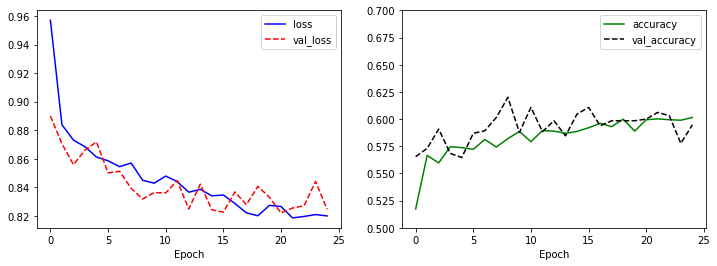

In [24]:
#다항 분류 모델 학습 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel("Epoch")
plt.ylim(0.5, 0.7)
plt.legend()

plt.show()

In [25]:
#다항 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 548us/step - loss: 0.8035 - accuracy: 0.6131


[0.8035319447517395, 0.61307692527771]